<a href="https://colab.research.google.com/github/ykhier/Cloud_Course/blob/main/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
def fetch_page(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
            "Mozilla/5.0"
        )
    }
    try:
        response = requests.get(url, headers=headers)
        print("HTTP status:", response.status_code)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            return soup
        else:
            print("Response head:", response.text[:200])
            return None
    except Exception as e:
        print("Request error:", e)
        return None

In [2]:
import re
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index

In [3]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index

In [4]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index

In [5]:
def search(query, index):
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    if word in index:
      results[word] = index[word]
  return results

In [6]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
     return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results

In [28]:
import requests

FIREBASE_URL = "https://myfirstapp-90f0c-default-rtdb.firebaseio.com"

def save_index_to_firebase(page_url, keywords_index):
    data_to_save = {
        "index": keywords_index,
        "url": page_url
    }

    full_url = FIREBASE_URL.rstrip("/") + "/first_index.json"

    response = requests.post(full_url, json=data_to_save)
    print("status code:", response.status_code)
    print("response:", response.text)
    return response



In [29]:
url = "https://www.nature.com/articles/s41598-025-05102-0"

KEYWORDS = [
    "plant",
    "disease",
    "leaf",
    "detection",
    "arduous",
    "simple",
    "fruit",
    "blight",
    "lesion",
    "image"
]

soup = fetch_page(url)
full_index = index_words(soup)

keywords_index = {}
for word in KEYWORDS:
    w = word.lower()
    keywords_index[word] = full_index.get(w, 0)

url = "https://www.nature.com/articles/s41598-025-05102-0"

save_index_to_firebase(url, keywords_index)

HTTP status: 200
status code: 200
response: {"name":"-OfKWt9O4WdR6y2uDmyL"}


<Response [200]>

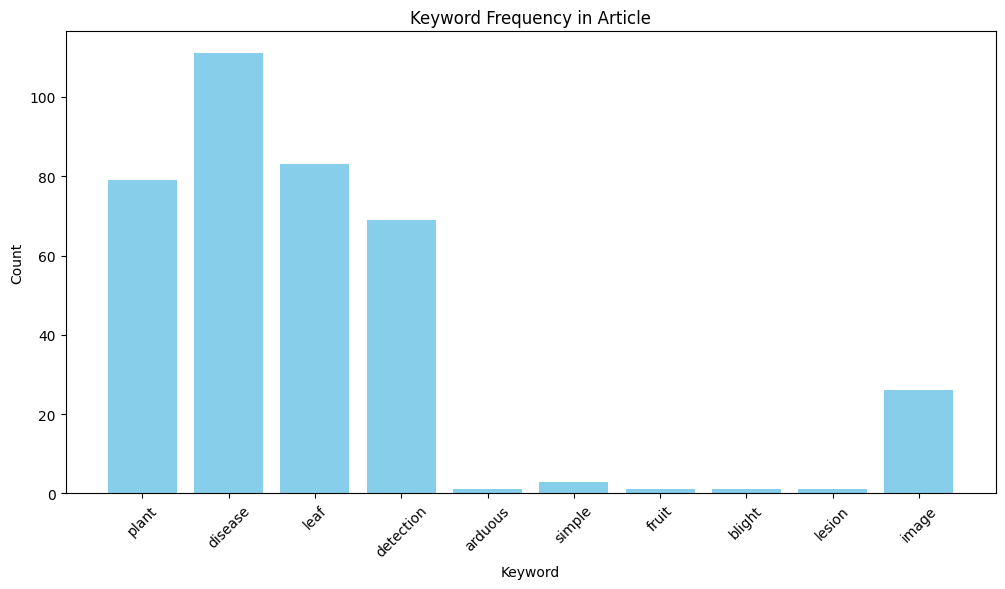

In [30]:
import matplotlib.pyplot as plt

# keywords_index הוא המילון שלך
words = list(keywords_index.keys())
counts = list(keywords_index.values())

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')

plt.title("Keyword Frequency in Article")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()


In [8]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

HTTP status: 200
{}


In [9]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [10]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

HTTP status: 200
{'bird': 575, 'wing': 25}


In [11]:
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank


In [12]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
   rank = rank*1/count
rank = 1-rank
print(rank)

HTTP status: 200
{'bird': 575, 'wing': 25}
0.9999304347826087


In [13]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'collage students'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)


HTTP status: 200
{}
0


In [14]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'owls'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)

HTTP status: 200
{'owl': 13}
0.9230769230769231


In [15]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'Industry'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)

HTTP status: 200
{'industri': 3}
0.6666666666666667




```
# This is formatted as code
```

### **מנוע המיועד למספר דפים**

In [16]:
import requests
from bs4 import BeautifulSoup
import re
from collections import defaultdict
class WikiSearchEngine:
  def __init__(self):
    """Initialize the search engine"""
    self.base_url = "https://en.wikipedia.org/w/api.php"
    self.pages = []
    self.word_locations = defaultdict(list) # word -> [(page_id, frequency), ...]
    self.stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at', 'to', 'for', 'of', 'with'}
    return False
  def fetch_wiki_pages(self, topic, num_pages=5):
    """Fetch Wikipedia pages for given topic"""
    search_params = {
      "action": "query",
      "format": "json",
      "list": "search",
      "srsearch": topic,
      "srlimit": num_pages
    }
    try:
      response = requests.get(self.base_url, params=search_params)
      search_results = response.json()['query']['search']

      for result in search_results:
        content_params = {
            "action": "query",
            "format": "json",
            "prop": "extracts|info",
            "pageids": result['pageid'],
            "inprop": "url",
            "explaintext": True
        }
        content_response = requests.get(self.base_url, params=content_params)
        page_data = content_response.json()['query']['pages'][str(result['pageid'])]
        self.pages.append({
          'id': result['pageid'],
          'title': page_data['title'],
          'url': page_data.get('fullurl', f"https://en.wikipedia.org/?curid={result['pageid']}"),
          'content': page_data['extract']
        })
      print(f"Retrieved: {page_data['title']}")
      return True

    except Exception as e:
      print(f"Error fetching pages: {str(e)}")

  def build_index(self):
        """Build a simple word location index"""
        self.word_locations.clear()

        # Process each page
        for page in self.pages:
            # Get all words from content
            words = re.findall(r'\w+', page['content'].lower())

            # Count word frequencies
            word_counts = defaultdict(int)
            for word in words:
                if word not in self.stop_words:
                    word_counts[word] += 1

            # Add to index with page information
            for word, count in word_counts.items():
                self.word_locations[word].append((page['id'], count))

  def search(self, query, num_results=5):
        """Search pages using simple word frequency ranking.
        Ranks pages based on:1. Number of query words found in the page
        2. Total frequency of query words  """
        # Get query words
        query_words = [word.lower() for word in re.findall(r'\w+', query)
                    if word.lower() not in self.stop_words]
        if not query_words:
            return []

        # Calculate scores for each page
        page_scores = defaultdict(lambda: {'matches': 0, 'total_freq': 0})

        # For each query word
        for word in query_words:
            # Find pages containing this word
            for page_id, freq in self.word_locations.get(word, []):
                page_scores[page_id]['matches'] += 1
                page_scores[page_id]['total_freq'] += freq


        # Convert to list and sort
        ranked_results = [
            (page_id, scores['matches'], scores['total_freq'])
            for page_id, scores in page_scores.items()
        ]
        # Sort by number of matching words first, then by total frequency
        ranked_results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        # Format results
        results = []
        for page_id, matches, total_freq in ranked_results[:num_results]:
            page = next(p for p in self.pages if p['id'] == page_id)
            # Find the first matching word context
            context = self.get_context(page['content'], query_words)
            results.append({
                'title': page['title'],
                'url': page['url'],
                'matching_words': matches,
                'total_frequency': total_freq,
                'context': context
            })
        return results


In [17]:
def fetch_wiki_pages(self, topic, num_pages=5):
  """Fetch Wikipedia pages for given topic"""
  search_params = {
  "action": "query",
  "format": "json",
  "list": "search",
  "srsearch": topic,
  "srlimit": num_pages
  }
  try:
      response = requests.get(self.base_url, params=search_params)
      search_results = response.json()['query']['search']

      for result in search_results:
        content_params = {
            "action": "query",
            "format": "json",
            "prop": "extracts|info",
            "pageids": result['pageid'],
            "inprop": "url",
            "explaintext": True
        }
        content_response = requests.get(self.base_url, params=content_params)
        page_data = content_response.json()['query']['pages'][str(result['pageid'])]
        self.pages.append({
          'id': result['pageid'],
          'title': page_data['title'],
          'url': page_data.get('fullurl', f"https://en.wikipedia.org/?curid={result['pageid']}"),
          'content': page_data['extract']
        })
        print(f"Retrieved: {page_data['title']}")
      return True

  except Exception as e:
    print(f"Error fetching pages: {str(e)}")


In [18]:
    def build_index(self):
        """Build a simple word location index"""
        self.word_locations.clear()

        # Process each page
        for page in self.pages:
            # Get all words from content
            words = re.findall(r'\w+', page['content'].lower())

            # Count word frequencies
            word_counts = defaultdict(int)
            for word in words:
                if word not in self.stop_words:
                    word_counts[word] += 1

            # Add to index with page information
            for word, count in word_counts.items():
                self.word_locations[word].append((page['id'], count))

    def search(self, query, num_results=5):
        """Search pages using simple word frequency ranking.
        Ranks pages based on:1. Number of query words found in the page
        2. Total frequency of query words  """
        # Get query words
        query_words = [word.lower() for word in re.findall(r'\w+', query)
                      if word.lower() not in self.stop_words]
        if not query_words:
            return []

        # Calculate scores for each page
        page_scores = defaultdict(lambda: {'matches': 0, 'total_freq': 0})

        # For each query word
        for word in query_words:
            # Find pages containing this word
            for page_id, freq in self.word_locations.get(word, []):
                page_scores[page_id]['matches'] += 1
                page_scores[page_id]['total_freq'] += freq


        # Convert to list and sort
        ranked_results = [
            (page_id, scores['matches'], scores['total_freq'])
            for page_id, scores in page_scores.items()
        ]
        # Sort by number of matching words first, then by total frequency
        ranked_results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        # Format results
        results = []
        for page_id, matches, total_freq in ranked_results[:num_results]:
            page = next(p for p in self.pages if p['id'] == page_id)
            # Find the first matching word context
            context = self.get_context(page['content'], query_words)
            results.append({
                'title': page['title'],
                'url': page['url'],
                'matching_words': matches,
                'total_frequency': total_freq,
                'context': context
            })
        return results